# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Arao, John Robert \
_Student No._: 2022-01967 \
_Section_: TX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: 10/06/2024 - 11:10 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** **John Robert Arao**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [41]:
import numpy as np

#Define the matrix given using numpy array
A = np.array([[8,-2,-20],[-2,-3,-9],[-20,-9,-3]])

#use the linalg package to extract the eigenvectors and eigenvalues
D, V = np.linalg.eigh(A)

#Print the results
print('The eigenvalues are: ')
print(D)

print()
print('The eigenvectors are: ')
print(V)

The eigenvalues are: 
[-21.99606195   0.16021522  23.83584674]

The eigenvectors are: 
[[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]


### Discussion

Since the given matrix is a 3x3 square matrix it is expected to get three eigenvalues. From the representation above,
\begin{align}
     AV = VD
  \end{align}
where, V is the eigenvectors and D is the eigvalues.

We can also rewrite this in detereminant of matrix form as the following:
\begin{align}
   |A - DI| = 0
  \end{align}

This would suggest that the number of elements in the diagonal gives the number of the eigenvalues D.


In [47]:
#use the numpy frobenius norm fuction to compute the error between the two matrix
err = np.linalg.norm(np.matmul(A,V) - np.matmul(V,np.diag(D)))/np.linalg.norm(np.matmul(A,V))
print('The relative error is: ' + str(err))

The relative error is: 3.1023925402670955e-16


##Discussion

> In cheking if the derived eigenvectors from the eigenvalues, we must inspect if the first equation stands, i.e. if the relative error of the values of the rhs and lhs of the equation is very small.

From the results, the relative error is in $ 10^{-16} $ order. This is very small and can be accounted to the limitations of the computer.

> **Hence, we can conclude that the computed eigenvectors and eigenvalues from numpy's linalg package is accurate**






### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

In [58]:
#define the given values
c = 2
ac = 10 ** -6

#define all initial guesses
er = 1     #this should initially satisfy the when loop
x = 1.0

#use the relaxation method
while er > ac : #use a while loop to minimize the error to the desired accuracy
  #define the given equation and store the initial value to a dummy variable x2
  x,x1= 1-np.exp(-c*x), x
  #compute the error of the relaxation method
  er = abs((x-x1)/(1-1/(-c*np.exp(-c*x))))
  print(x)

#print the values
print()
print(f'The values of x converges to {x:.3e}')


0.8646647167633873
0.8225966691808597
0.8070247503317746
0.8009201942366403
0.7984747083247583
0.7974866394625985
0.797086049491047
0.796923413762181
0.7968573480008734
0.7968305046795713
0.7968195968986895
0.7968151643557075
0.7968133630966887

The values of x converges to 7.968e-01


#Discussion

> The relaxation method successfully works if the values of the iterated nonlinear equation converges to a point.

In the results, the iterations converges the value of x to $0.7968$. This is guided with an error less than $10^{-6}$ .

> **Hence, we can conclude that the relaxation method successfully solves the nonlinear equation with an accuracy of $10^{-6}$**

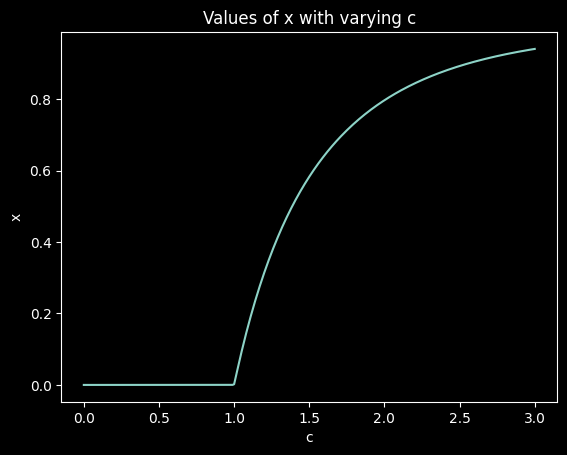

In [59]:
import matplotlib.pyplot as plt
from matplotlib import style

# redifine c to values from 0 to 3 in steps of 0.01 using numpy arrange function
c = np.arange(0,3.01,0.01)

# set a list with the initial value for c=0
x_values =[0]

#solve the values of x from 0.01 to 3
for k in range(1, len(c)):
  #define all initial guesses
  ac = 10 ** -6
  er = 1
  x1 = 1
  while er > ac :
    x1,x2= 1-np.exp(-c[k]*x1), x1
    er = abs((x1-x2)/(1-1/(-c[k]*np.exp(-c[k]*x1))))
  x_values.append(x1)

#make and customize the plot
plt.style.use('dark_background')
plt.plot(c,x_values)
plt.xlabel('c')
plt.ylabel('x')
plt.title('Values of x with varying c')
plt.show()

## Discussion

With the established accuracy of the relaxation method above, we can iterate it to varying values of c from 0 to 3. However, the value of x with $c = 0$ cannot be computed in the same manner due to the nature of computing its error putting the value of c in denominator. Hence, we can just follow the trend of the subsequent values, which converges to zero.

Meanwhile, rewriting the given equation,
\begin{align}
    x = 1 - \frac{1}{e^{cx}}
  \end{align}

This would suggest that the second term's maximum value is 1, which in turn makes $x = 0$. Additionally, as c approaches infinity, the second term approaches 0, which in turn makes $x=1$. Lastly, we can expect an exponential graph from the exponential term.

> **All of the expected behaviors of the function is consistent with the produced graph from the values of x using the relaxation method.**



### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [63]:
#Write all the given values from exercise 6.16
G = 6.674 * 10**-11
M = 5.974 * 10**24
m = 7.348 * 10**22
R = 3.844 * 10**8
w = 2.662 * 10**-6

#set the accuracy to have an accurate solution to atleast 4 significant figures
acc = 10**-6

#define the function given
def f(r):
  return ((G*M/(r**2) - G*m/(R-r)**2) / w**2)

#define the derivative of the function
def g(r):
  return ((-2*G*M/(r**3) - 2*G*m/(R-r)**3)/w**2)

#define all initial guesses
delta = 1.0   #make sure that delta is higher than the accuracy
r = 1.0       #this cannot be a zero since this will be used as a denominator

#use Newton's method to find the root
while abs(delta)>acc:       #this ensures that the accuracy will be met
  delta = (f(r) / g(r))     #this also serve as the central difference
  r -= delta                #this is based on the derivations of Newton's method

#print the converged value using a format specifier to 4 significant figures
print(f"L1 point distance from Earth: {r:.3e} m")

L1 point distance from Earth: 3.460e+08 m


## Discussion

The Lagrange point, as stated above, is the stable point between the two bodies where it is constantly there. Adopting all the assumed conditions above, we can theoretically compute the L1 by solving the nonlinear equation through a more accurate method -- the Newton's method.

\begin{align}
    x' = x - \Delta x = x - \frac{f(x)}{f'(x)}
  \end{align}

The Newton's method is dependent on the slope (derivative) of the function on the initial guess. Hence, this is only applicable on functions with known derivatives. Luckily, the assigned problem is easily differentiable.

To ensure accuracy, $ \epsilon \approx \Delta x $ can be used to estimate the error for small error $\epsilon$. This error can be used to compare with the desired accuracy to continue the iteration until the desired accuracy is met. Since the expected value is large, $10^{-6}$ accuracy must be sufficient. Also, we can cut the significant figures to 4 to increase the accuracy.

For sanity check, $R>r$ and r should be nearer to the moon as it has lesser mass compare to Earth.

>**Hence, the value of $r$ from the equation that describes the point $L_1$ is $3.460 \times 10^{08}$ m.**
